In [138]:
# %matplotlib widget
import matplotlib.pyplot as plt
import Data 
from ipywidgets import AppLayout,IntSlider,Button,HTML, Layout,VBox
from ipywidgets import interact, interact_manual
import numpy as np

In [114]:
# define the widgets and build UI
header = HTML("<h3>Suitable Site for Factory</h3>", layout=Layout(height='auto'))
header.style.text_align='center'
Geology = IntSlider(description="Geology",value = 60)
Transport = IntSlider(description="Transport", value= 30)
Population = IntSlider(description="Population", value=10)
Run = Button(description='Run  Model')
# Run = Button(description="Execute")

In [117]:
# Instantiate the data class to acces read data function.
# the read method expect a file name
# pass the file name in the class costructor 
# invoke the read methods to read the criteria files into the model

geology_layer = Data.Read_data('Geology.txt').read()
tansport_layer = Data.Read_data('Transport.txt').read()
population_layer = Data.Read_data('Pop.txt').read()

Processed 530 lines from txt file.
Processed 530 lines from txt file.
Processed 530 lines from txt file.


In [118]:
#  get  weights of every layer from the widgets
#  Convert the slider values to parcentage

geo_w = Geology.value / 100
trans_w = Transport.value /100
pop_w = Population.value /100

In [119]:
def normalize_layer(layer):
      
    """Rescales the weighted overlay layer  to a scale of 0 to 255

    Parameters
    ----------
    Layer : list
        a list of weighted pixels from all the three layers.

    Returns
    -------
    list
        a new list whch is the normalized sum of every pixel at every given site.
    """
    # convert the weighted overlay layer to numpy array (norm)
    # Scale the rawpoints array so that each "column" is
    # normalized to the same scale
    # # Linear stretch from lowest value = 0 to highest value = 255
    # print the values to see the results
    # return the scaled layer in a list form.
    
    norm = np.array(layer)
    normalized_array = ((norm - norm.min()) * (1/(norm.max() - norm.min()) * 255).astype('uint8'))
    return normalized_array

In [120]:
def compute_weighted_overlay(geo_data,trans_data,pop_data,geo_w,trans_w,pop_w):
    """Get all the three criterias and combines the three layers depeding on their weights

    Parameters
    ----------
    geo_data : list
        a list of pixels values in the geology dataset
    trans_data : list
        a list of pixels values in the transport dataset
    Pop_data : list
        a list of pixels values in the population data dataset
    
    geo_w : float
        parcentage influence of geology on the selected results.
        
    trans_w : float
        parcentage influence of transport on the selected results.
    
     geo_w : float
        parcentage influence of populatio on the selected results.
    
    Returns
    
    -------
    list
        a new list whch is the sum of every pixel at every given site from the three layers.
    """
    
    weighted_layer = []
    
    for i in range(len(geo_data)):
        
        row = []
        
        for j in range(len(geo_data[0])):
            
            row.append(geo_data[i][j] * geo_w + trans_data[i][j] * trans_w + pop_data[i][j] * pop_w)
            
        weighted_layer.append(row)
        
    return weighted_layer



In [121]:
weighted_overlay_layer = compute_weighted_overlay(geology_layer,tansport_layer,population_layer,geo_w,trans_w,pop_w)
normalized_weighted_layer = normalize_layer(weighted_overlay_layer)

In [122]:
#  open the weighted_overlay text file with the write option.
# loop over the row colounms in the 2D list
# for every value in the row write it to file 

with open("weighted_overlay.txt", "w") as f:
    for line in normalized_weighted_layer:
        for value in line:
            f.write(str(value) + " ")
        f.write("\n")
        

In [135]:
#  plot the weigted overlay map
def plot_weighted_overlay_layer():
    
    """ plots the normalised_weighted _layer in grey scale
    """
    
    plt.imshow(weighted_overlay_layer,cmap='gray')
    plt.show()
    return 

In [ ]:
# plot individual maps:

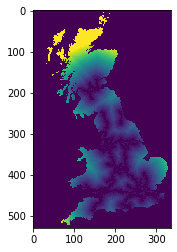

In [124]:
# plot other map layers 
# transport  layer
plt.imshow(tansport_layer)
plt.show()

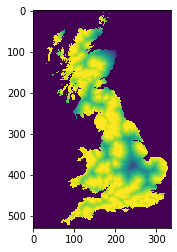

In [125]:
# geology layer
plt.imshow(geology_layer)
plt.show()

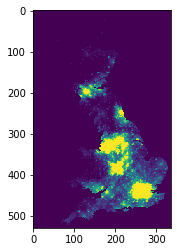

In [126]:
# population layer
plt.imshow(population_layer)
plt.show()

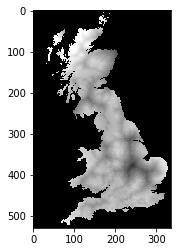

In [127]:
#  bind the model run button 
Run.on_click(plot_weighted_overlay_layer())

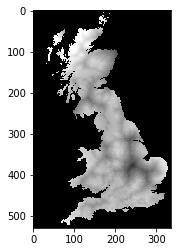

AppLayout(children=(HTML(value='<h3>Suitable Site for Factory</h3>', layout=Layout(grid_area='header', height=…

TypeError: 'NoneType' object is not callable

In [136]:
#  forms the GUI where user can adjust the weights and run the model again.
#  to see different suitable sites slide the layers depending on the influence the layer should have in the final decision 
#  for example 
"""
Geology at 60%
Transport  at 20% 
Population at 20%
and click on the execute the model.
"""

AppLayout(header=header,
          left_sidebar=None,
          center=plot_weighted_overlay_layer(),
          right_sidebar=VBox([Geology,Transport,Population,Run]),
          footer=None)

IntSlider(value=1, continuous_update=False, description='$\\omega$', max=10)

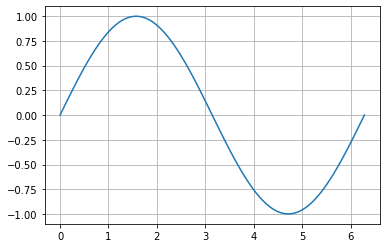

In [132]:
fig, ax = plt.subplots()
line, = ax.plot(x, np.sin(x))
ax.grid(True)
 
def update(change):
    line.set_ydata(np.sin(change.new * x))
    fig.canvas.draw()
     
int_slider = widgets.IntSlider(
    value=1, 
    min=0, max=10, step=1,
    description='$\omega$',
    continuous_update=False
)
int_slider.observe(update, 'value')
int_slider